#### About Dataset

#### 1. Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

#### 2. Content
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

#### 3. Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.



#### Dataset Description

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. We are asked to predict an integer classification for the forest cover type. The seven types are:

* 1 - Spruce/Fir
* 2 - Lodgepole Pine
* 3 - Ponderosa Pine
* 4 - Cottonwood/Willow
* 5 - Aspen
* 6 - Douglas-fir
* 7 - Krummholz

# Columns Profiling
* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation


The wilderness areas are:

* Rawah Wilderness Area
* Neota Wilderness Area
* Comanche Peak Wilderness Area
* Cache la Poudre Wilderness Area

The soil types are:

* Soil_Type1: Cathedral family - Rock outcrop complex, extremely stony.
* Soil_Type2: Vanet - Ratake families complex, very stony.
* Soil_Type3: Haploborolis - Rock outcrop complex, rubbly.
* Soil_Type4: Ratake family - Rock outcrop complex, rubbly.
* Soil_Type5:Vanet family - Rock outcrop complex complex, rubbly.
* Soil_Type6: Vanet - Wetmore families - Rock outcrop complex, stony.
* Soil_Type7: Gothic family.
* Soil_Type8: Supervisor - Limber families complex.
* Soil_Type9: Troutville family, very stony.
* Soil_Type10: Bullwark - Catamount families - Rock outcrop complex, rubbly.
* Soil_Type11: Bullwark - Catamount families - Rock land complex, rubbly.
* Soil_Type12: Legault family - Rock land complex, stony.
* Soil_Type13: Catamount family - Rock land - Bullwark family complex, rubbly.
* Soil_Type14: Pachic Argiborolis - Aquolis complex.
* Soil_Type15: unspecified in the USFS Soil and ELU Survey.
* Soil_Type16: Cryaquolis - Cryoborolis complex.
* Soil_Type17: Gateview family - Cryaquolis complex.
* Soil_Type18: Rogert family, very stony.
* Soil_Type19: Typic Cryaquolis - Borohemists complex.
* Soil_Type20: Typic Cryaquepts - Typic Cryaquolls complex.
* Soil_Type21: Typic Cryaquolls - Leighcan family, till substratum complex.
* Soil_Type22: Leighcan family, till substratum, extremely bouldery.
* Soil_Type23: Leighcan family, till substratum - Typic Cryaquolls complex.
* Soil_Type24: Leighcan family, extremely stony.
* Soil_Type25: Leighcan family, warm, extremely stony.
* Soil_Type26: Granile - Catamount families complex, very stony.
* Soil_Type27: Leighcan family, warm - Rock outcrop complex, extremely stony.
* Soil_Type28: Leighcan family - Rock outcrop complex, extremely stony.
* Soil_Type29: Como - Legault families complex, extremely stony.
* Soil_Type30: Como family - Rock land - Legault family complex, extremely stony.
* Soil_Type31: Leighcan - Catamount families complex, extremely stony.
* Soil_Type32: Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
* Soil_Type33: Leighcan - Catamount families - Rock outcrop complex, extremely stony.
* Soil_Type34: Cryorthents - Rock land complex, extremely stony.
* Soil_Type35: Cryumbrepts - Rock outcrop - Cryaquepts complex.
* Soil_Type36: Bross family - Rock land - Cryumbrepts complex, extremely stony.
* Soil_Type37: Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
* Soil_Type38: Leighcan - Moran families - Cryaquolls complex, extremely stony.
* Soil_Type39: Moran family - Cryorthents - Leighcan family complex, extremely stony.
* Soil_Type40: Moran family - Cryorthents - Rock land complex, extremely stony.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from pprint import pprint

In [ ]:
df = pd.read_csv('covtype.csv')

In [ ]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

# Exploratory Data Analysis

In [5]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [6]:
df.shape

(581012, 55)

### The dataset contains 581012 tree observations with 55 features.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

# The datatype of all columns is numeric.Based on the dataset description, I will be converting below columns to categorical:
* Wilderness_Area1
* Wilderness_Area2
* Wilderness_Area3
* Wilderness_Area4
* Soil_Type1 to Soil_Type40
* Cover_Type

In [8]:
categorical_columns = [
    'Wilderness_Area1', 
    'Wilderness_Area2', 
    'Wilderness_Area3', 
    'Wilderness_Area4'
]

categorical_columns += [f'Soil_Type{i}' for i in range(1, 41)]
categorical_columns.append('Cover_Type')

# Convert to category
df[categorical_columns] = df[categorical_columns].astype('category')

# Check the data types after conversion
print(df.dtypes)

Elevation                                int64
Aspect                                   int64
Slope                                    int64
Horizontal_Distance_To_Hydrology         int64
Vertical_Distance_To_Hydrology           int64
Horizontal_Distance_To_Roadways          int64
Hillshade_9am                            int64
Hillshade_Noon                           int64
Hillshade_3pm                            int64
Horizontal_Distance_To_Fire_Points       int64
Wilderness_Area1                      category
Wilderness_Area2                      category
Wilderness_Area3                      category
Wilderness_Area4                      category
Soil_Type1                            category
Soil_Type2                            category
Soil_Type3                            category
Soil_Type4                            category
Soil_Type5                            category
Soil_Type6                            category
Soil_Type7                            category
Soil_Type8   

# Check Missing Values

In [9]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


# Interpretation : There are no missing values in the dataset.

# Check Duplicates

In [10]:
df.duplicated().sum()

0

# Interpretation : There are no duplicates values in the dataset.

# Statistical Analysis

In [11]:
df.describe(include = "category")

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  \
count             581012            581012            581012   
unique                 2                 2                 2   
top                    0                 0                 0   
freq              320216            551128            327648   

        Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  \
count             581012      581012      581012      581012      581012   
unique                 2           2           2           2           2   
top                    0           0           0           0           0   
freq              544044      577981      573487      576189      568616   

        Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
count       581012      581012      581012      581012      581012   
unique           2           2           2           2           2   
top              0           0           0           0           0   
freq        579415      574437      580907      580833      579865   

        Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
count        581012       581012       581012       581012       581012   
unique            2            2            2            2            2   
top               0            0            0            0            0   
freq         548378       568602       551041       563581       580413   

        Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
count        581012       581012       581012       581012       581012   
unique            2            2            2            2            2   
top               0            0            0            0            0   
freq         581009       578167       577590       579113       576991   

        Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
count        581012       581012       581012       581012       581012   
unique            2            2            2            2            2   
top               0            0            0            0            0   
freq         571753       580174       547639       523260       559734   

        Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
count        581012       581012       581012       581012       581012   
unique            2            2            2            2            2   
top               0            0            0            0            0   
freq         580538       578423       579926       580066       465765   

        Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  \
count        581012       581012       581012       581012       581012   
unique            2            2            2            2            2   
top               0            0            0            0            0   
freq         550842       555346       528493       535858       579401   

        Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  \
count        581012       581012       581012       581012       581012   
unique            2            2            2            2            2   
top               0            0            0            0            0   
freq         579121       580893       580714       565439       567206   

        Soil_Type40  Cover_Type  
count        581012      581012  
unique            2           7  
top               0           2  
freq         572262      283301

In [12]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

<AxesSubplot:>

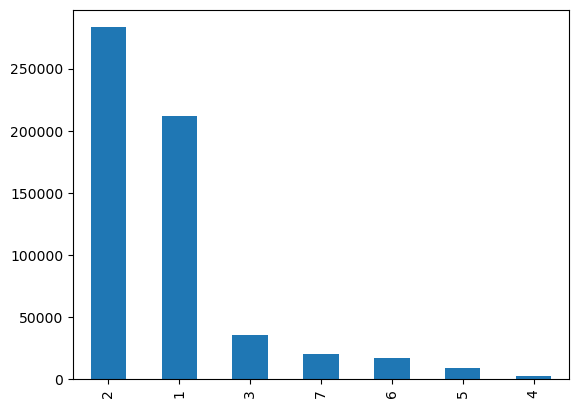

In [13]:
df['Cover_Type'].value_counts().plot(kind = 'bar')

#### Key Insights:

* Wilderness Areas: All four wilderness areas show that the value '0' dominates the data, meaning that most instances do not belong to any particular wilderness area.

* Soil Types: Similar to wilderness areas, for each soil type variable, '0' appears more frequently.This suggests that for the vast majority of instances, the soil type indicators are inactive, meaning that most soil type variables do not apply to the majority of the data points.

* Cover Type: There are 7 unique cover types, and Cover Type 2 is the most frequent, with 283,301 instances, suggesting that this cover type is the most prevalent in the data.

#### Data Imbalance:

These insights suggest that the dataset is highly imbalanced, particularly with respect to wilderness areas and soil types, which could influence model performance and necessitate balancing techniques or adjustments in the analysis.

In terms of target variable, which is Cover_Type, the data is highly imbalanced with most of the obervations corresponds to Cover_Type 2 and Cover_Type 1.

In [14]:
df.describe()

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count  581012.000000                       581012.000000  
mean      142.528263                         1980.291226  
std        38.274529                         1324.195210  
min         0.000000                            0.000000  
25%       119.000000                         1024.000000  
50%       143.000000                         1710.000000  
75%       168.000000                         2550.000000  
max       254.000000                         7173.000000

# Univariate Analysis : Categorical Variables

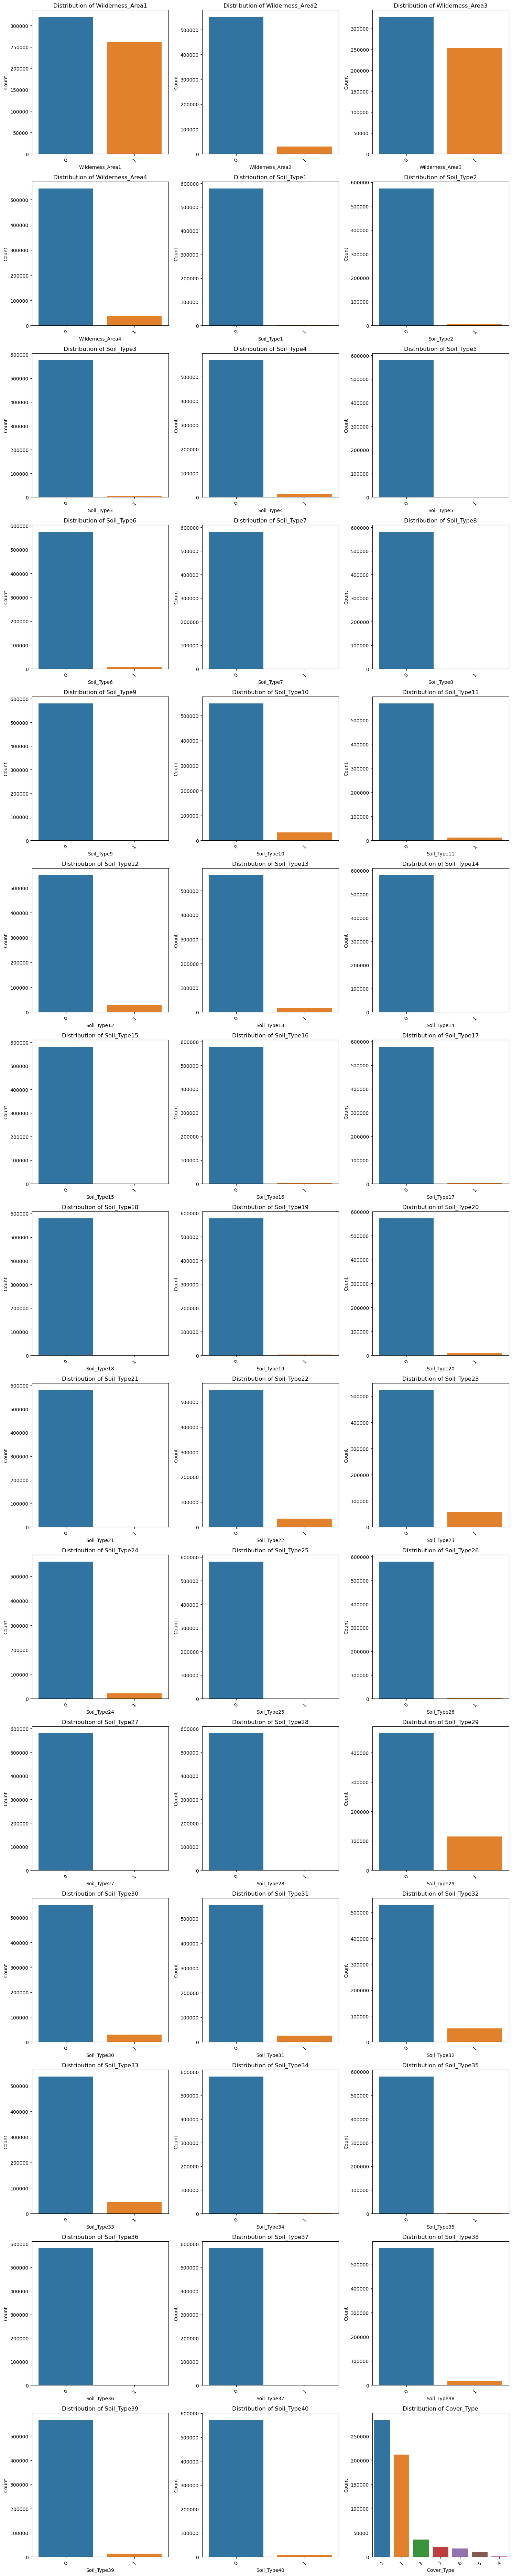

In [15]:
n_cols = 3
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)  # Calculate rows needed

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Univariate Analysis : Continuous Variables

In [16]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Variables:")
print(numerical_columns)

Numeric Variables:
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


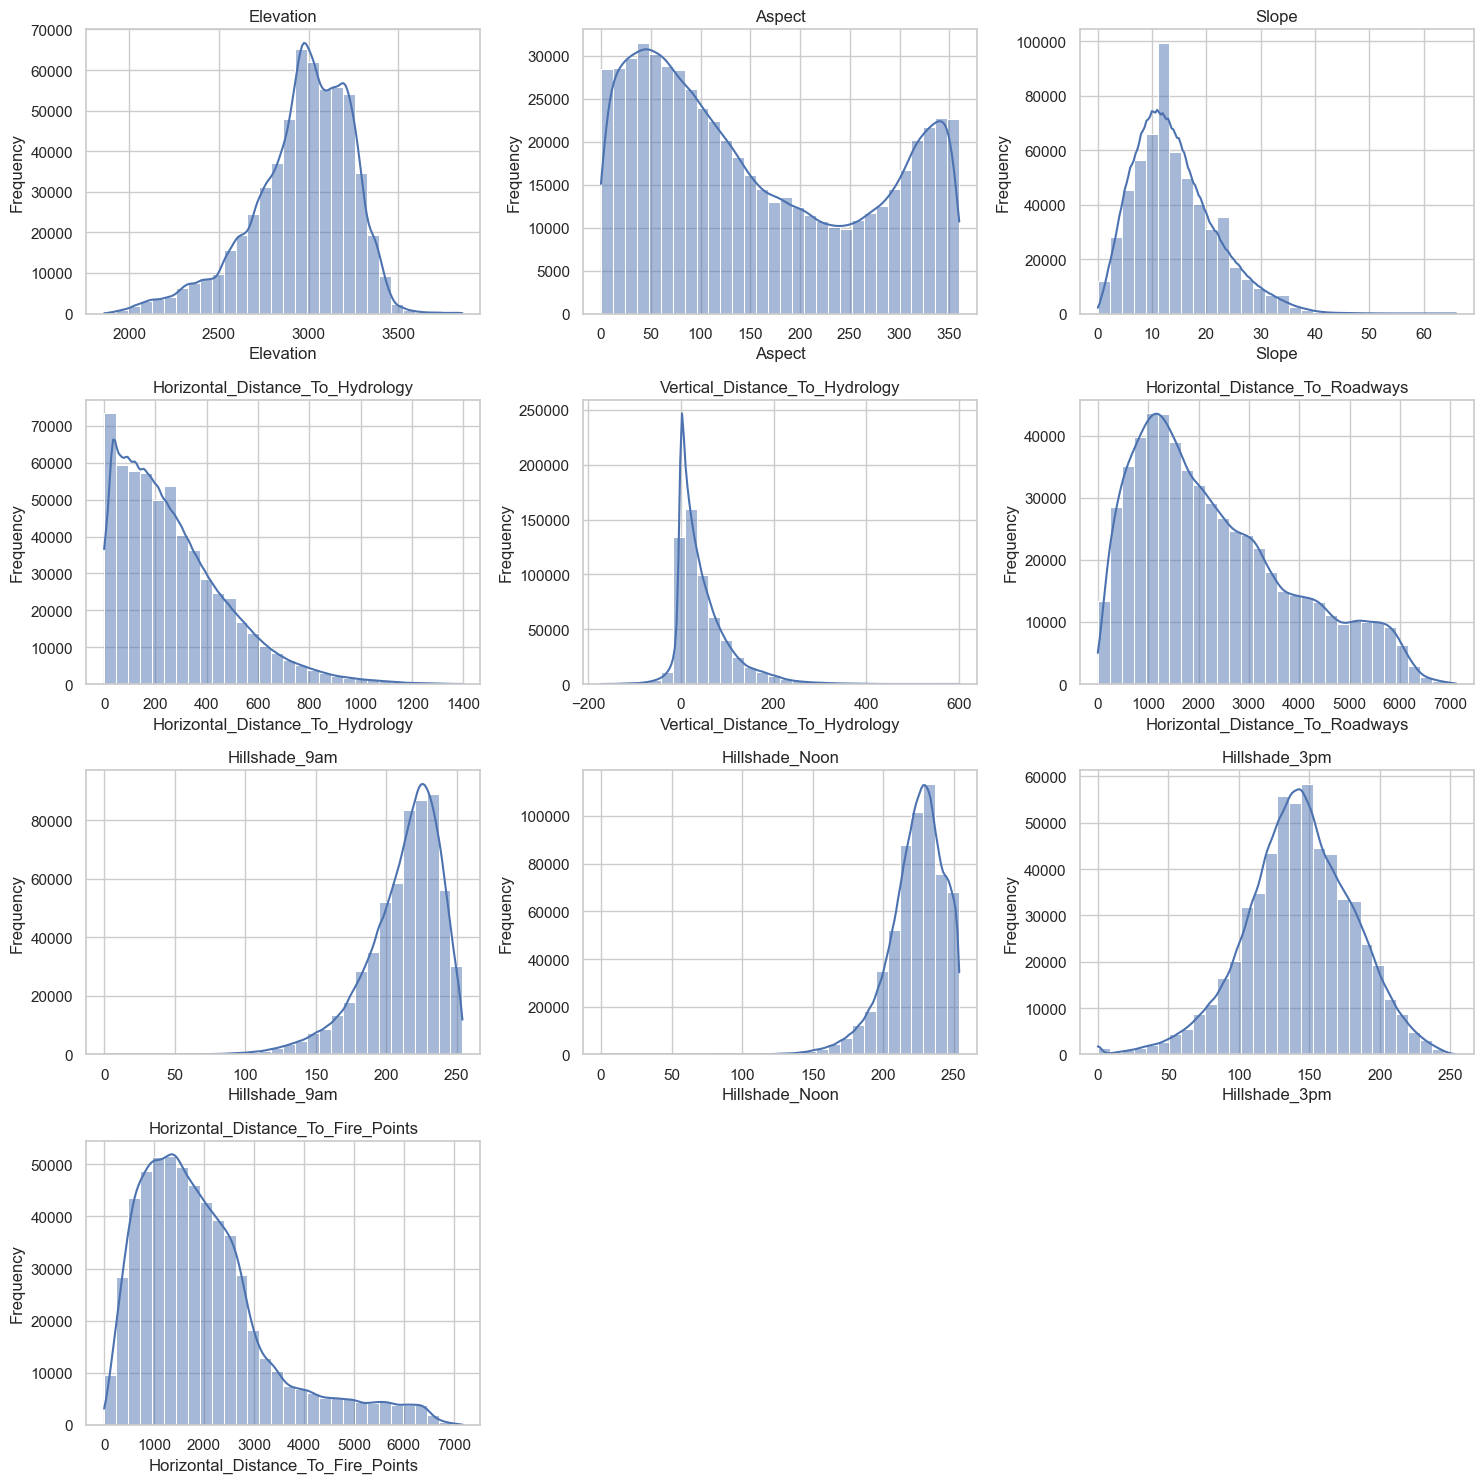

In [17]:
#Set the style of seaborn
sns.set(style='whitegrid')

num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, (num_vars // 3) * 5))

axes = axes.flatten()

for i, var in enumerate(numerical_columns):
    sns.histplot(df[var], bins=30, ax=axes[i], kde=True)
    axes[i].set_title(var)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

# Interpretation : It is seen that for all numerical variables, the data is not normally distributed.

# Analysing Correation

<AxesSubplot:>

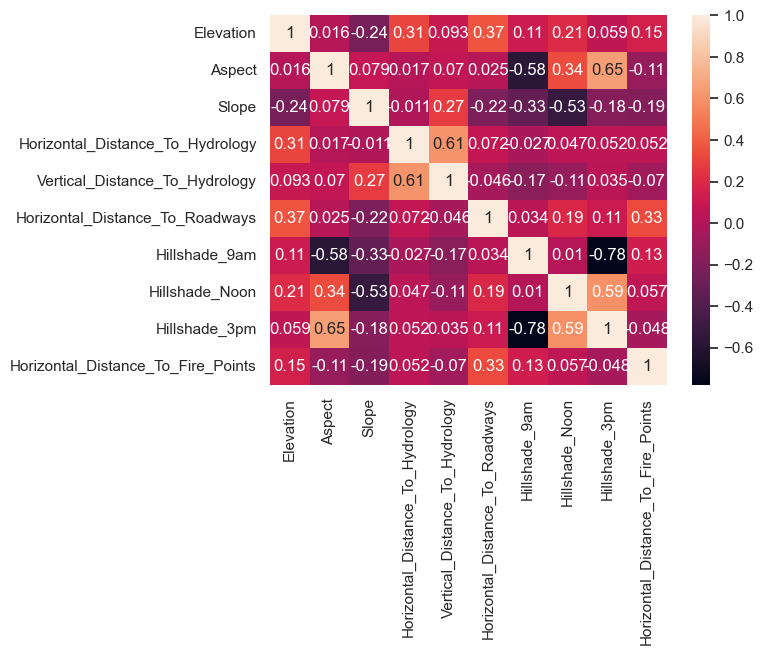

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)

In [19]:
df.corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015735 -0.242697   
Aspect                               0.015735  1.000000  0.078728   
Slope                               -0.242697  0.078728  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093306  0.070305  0.274976   
Horizontal_Distance_To_Roadways      0.365559  0.025121 -0.215914   
Hillshade_9am                        0.112179 -0.579273 -0.327199   
Hillshade_Noon                       0.205887  0.336103 -0.526911   
Hillshade_3pm                        0.059148  0.646944 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148022 -0.109172 -0.185662   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.306229   
Aspect                                                      0.017376   
Slope                                                      -0.010607   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.606236   
Horizontal_Distance_To_Roadways                             0.072030   
Hillshade_9am                                              -0.027088   
Hillshade_Noon                                              0.046790   
Hillshade_3pm                                               0.052330   
Horizontal_Distance_To_Fire_Points                          0.051874   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.093306   
Aspect                                                    0.070305   
Slope                                                     0.274976   
Horizontal_Distance_To_Hydrology                          0.606236   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                          -0.046372   
Hillshade_9am                                            -0.166333   
Hillshade_Noon                                           -0.110957   
Hillshade_3pm                                             0.034902   
Horizontal_Distance_To_Fire_Points                       -0.069913   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.365559   
Aspect                                                     0.025121   
Slope                                                     -0.215914   
Horizontal_Distance_To_Hydrology                           0.072030   
Vertical_Distance_To_Hydrology                            -0.046372   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                              0.034349   
Hillshade_Noon                                             0.189461   
Hillshade_3pm                                              0.106119   
Horizontal_Distance_To_Fire_Points                         0.331580   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                0.112179        0.205887   
Aspect                                  -0.579273        0.336103   
Slope                                   -0.327199       -0.526911   
Horizontal_Distance_To_Hydrology        -0.027088        0.046790   
Vertical_Distance_To_Hydrology          -0.166333       -0.110957   
Horizontal_Distance_To_Roadways          0.034349        0.189461   
Hillshade_9am                            1.000000        0.010037   
Hillshade_Noon                           0.010037        1.000000   
Hillshade_3pm                           -0.780296        0.594274   
Horizontal_Distance_To_Fire_Points       0.132669        0.057329   

                                    Hillshade_3pm  \
Elevation                                0.059148   
Aspect                                   0.646944   
Slope      

Based on the provided data and correlation analysis, here are some insights:

* Elevation:

The mean elevation is approximately 2959 meters, with a maximum of 3858 meters. This suggests a mountainous region, which may affect vegetation types and wildlife habitats.
Elevation is positively correlated with horizontal distance to hydrology (0.31), indicating that higher elevations are generally farther from water bodies.

* Aspect:

The aspect (orientation of the slope) has a weak correlation with most variables. However, it is negatively correlated with hillshade at 9 am (-0.58), suggesting that slopes facing away from the sun may have less sunlight exposure in the morning.

* Slope:

The slope shows a negative correlation with elevation (-0.24), which indicates that areas with steeper slopes are generally at lower elevations.
It also has a positive correlation with vertical distance to hydrology (0.27), suggesting that steeper areas may drain water more effectively.

* Horizontal Distances:

The distances to hydrology and roadways show positive correlations with each other, indicating that areas further from water sources are also generally further from road access. This may impact ecological zones and human accessibility.

* Hillshade Measurements:
Hillshade values at noon and in the afternoon are positively correlated (0.59), suggesting that the areas receiving more sunlight during the day have consistent shading patterns throughout the day, affecting plant growth.
Hillshade at 9 am has a strong negative correlation with hillshade at 3 pm (-0.78), indicating a significant variation in sunlight exposure throughout the day, which can impact temperature and moisture levels in these areas.

* Horizontal Distance to Fire Points:

This variable is positively correlated with horizontal distance to roadways (0.33), suggesting that areas further from roads may also be less accessible for fire management interventions.

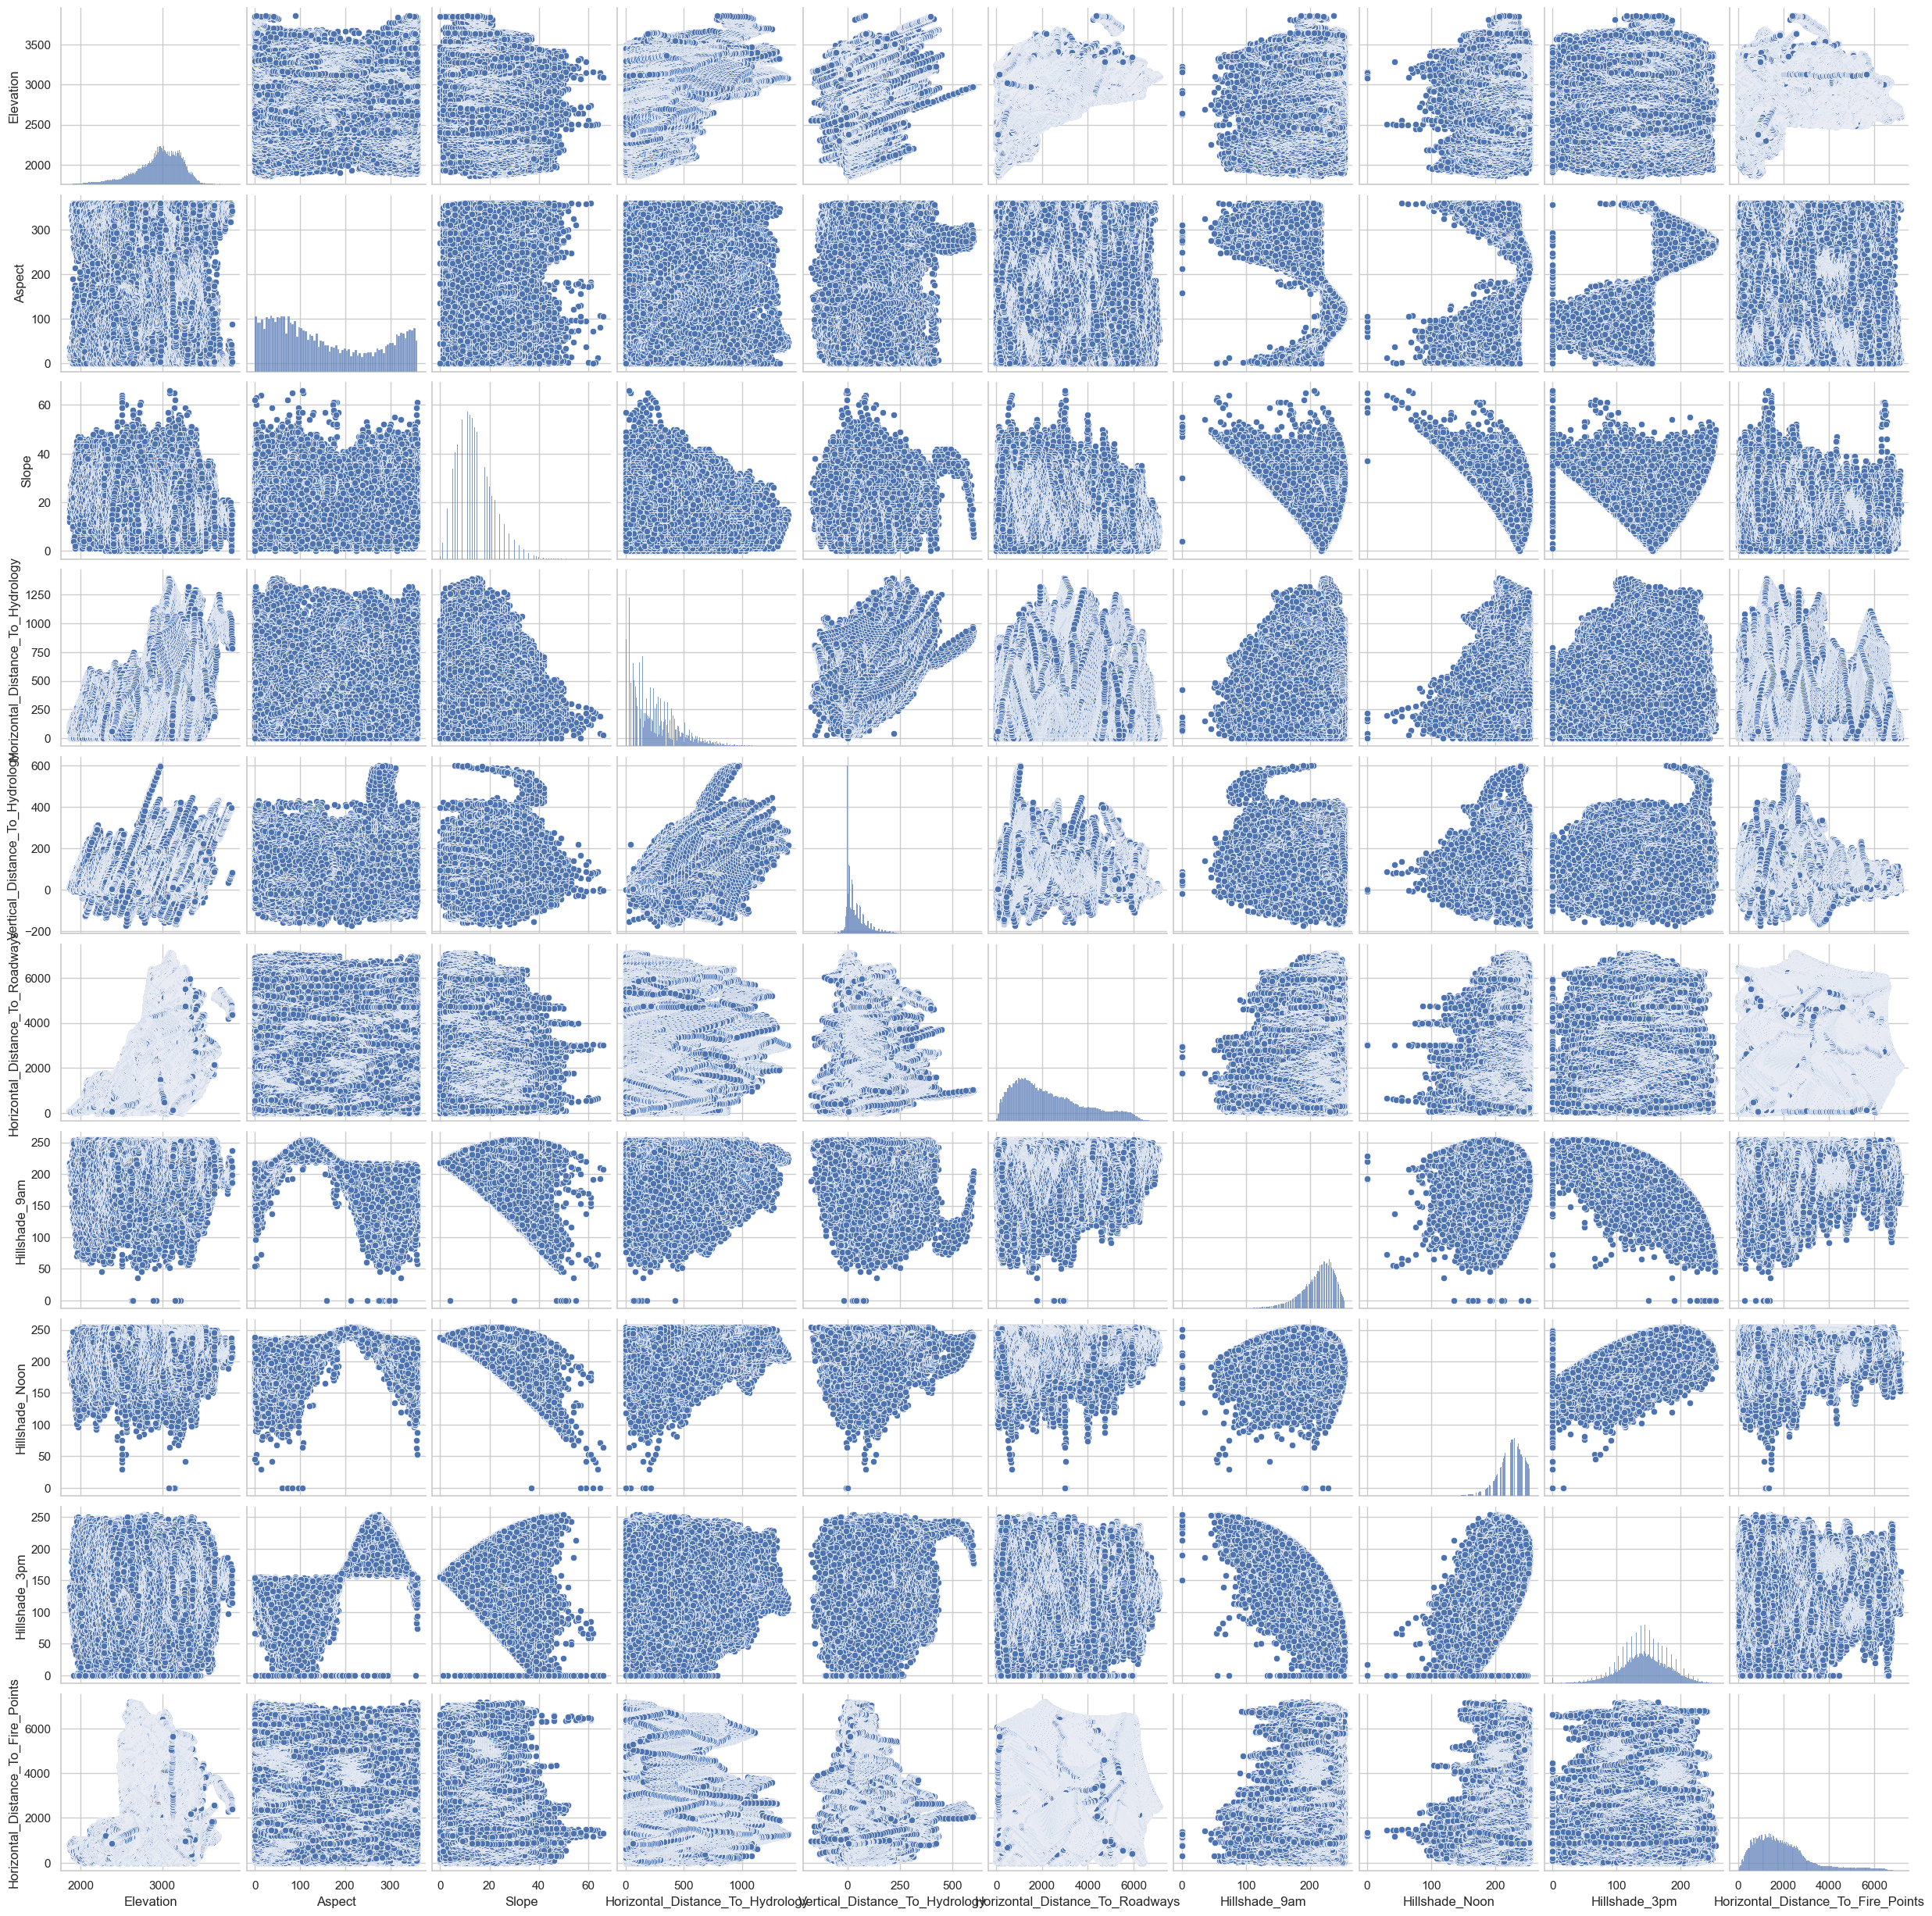

In [20]:
sns.pairplot(df)

# Outlier Detection

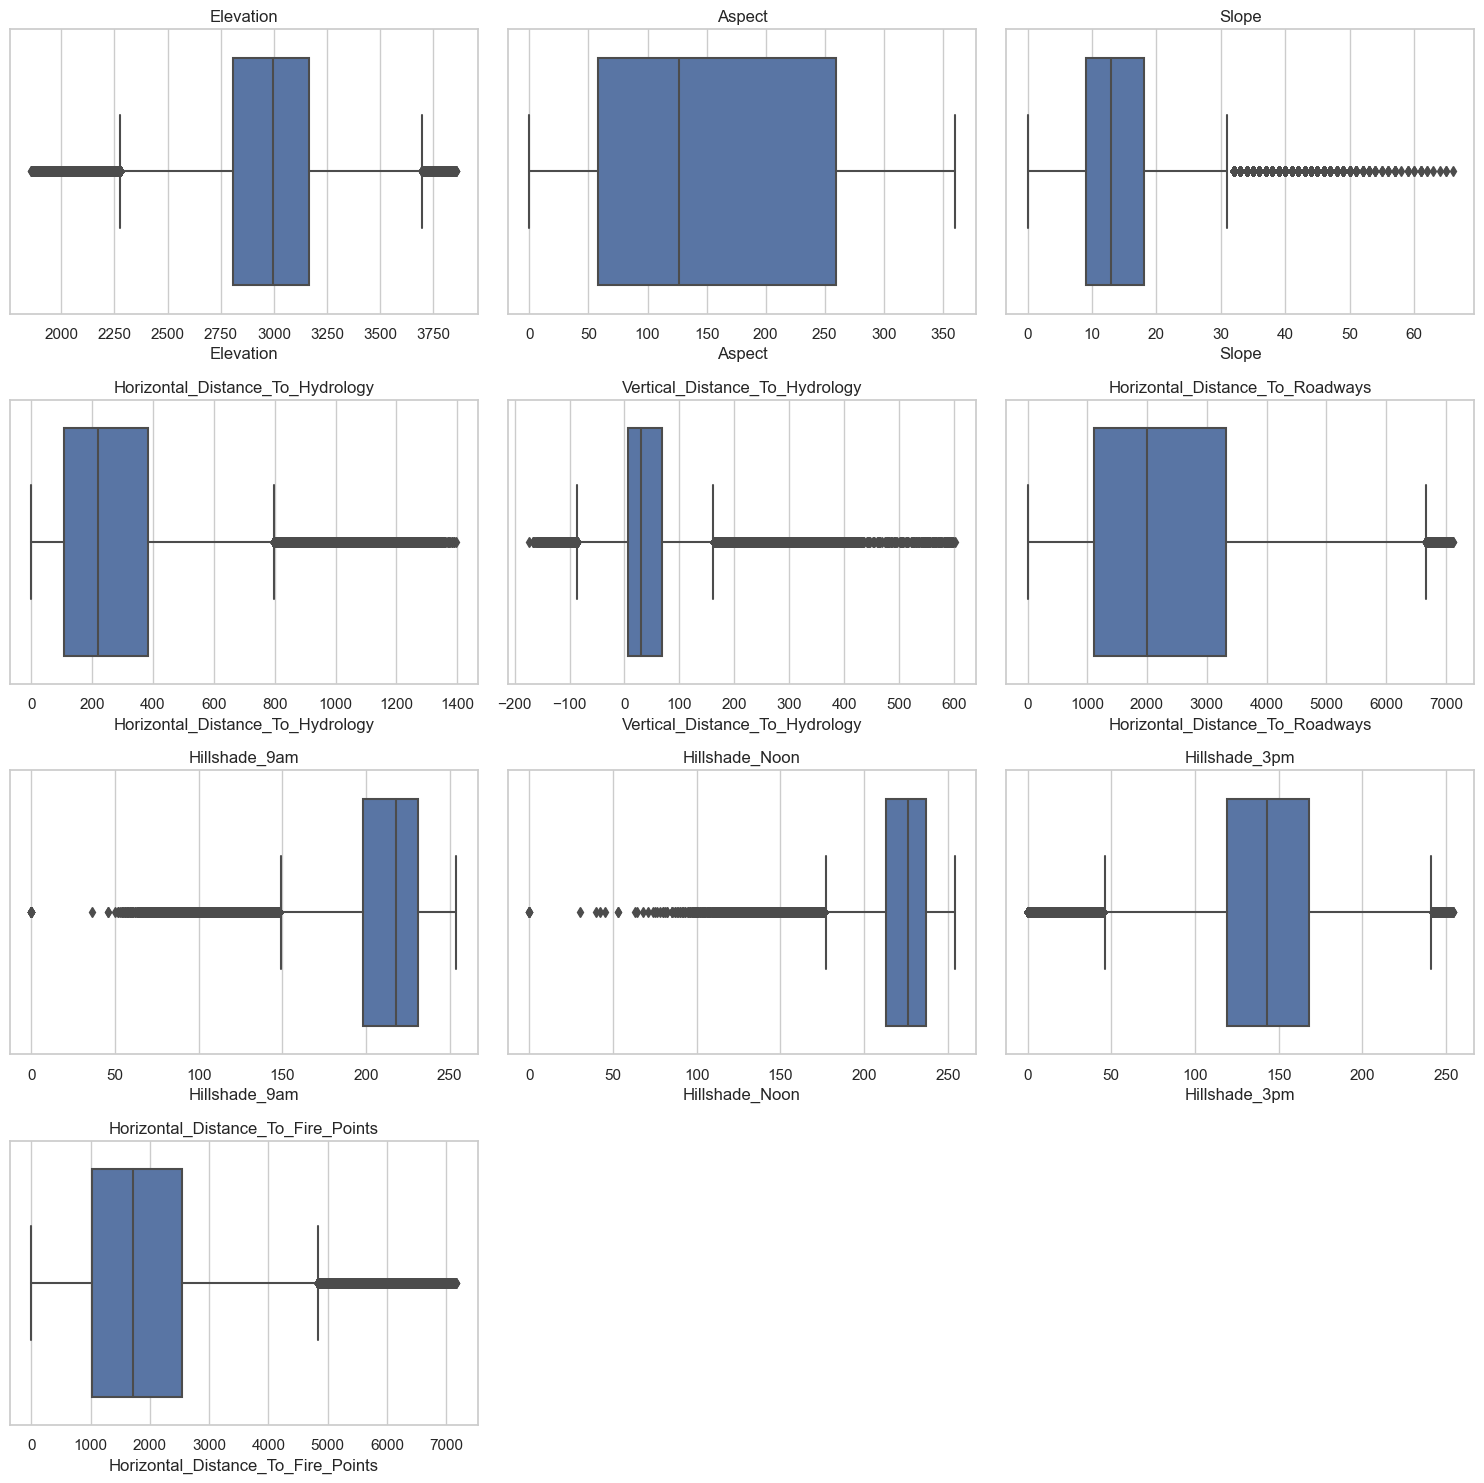

In [21]:
# Set the style of seaborn
sns.set(style='whitegrid')
num_vars = len(numerical_columns)
fig, axes = plt.subplots(nrows=(num_vars // 3) + 1, ncols=3, figsize=(15, (num_vars // 3) * 5))
axes = axes.flatten()
for i, var in enumerate(numerical_columns):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(var)
    axes[i].set_xlabel(var)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# Interpretation:

* It is observe that most of the columns contains outliers.

# Split the Data

In [22]:

# Splitting the data into features (X) and target (y)
X = df.drop('Cover_Type', axis=1)  
y = df['Cover_Type']

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:

X_train.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
519924       3289      22     19                               240   
318451       2963      21     18                               134   
22325        3037     185      9                               127   
449376       3113     203     13                               190   
482753       3128     346      9                               120   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
519924                              93                             1708   
318451                              27                             1243   
22325                               10                             6462   
449376                              22                             2125   
482753                              36                              552   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
519924            205             196            122   
318451            206             200            127   
22325             222             246            158   
449376            213             251            171   
482753            203             226            161   

        Horizontal_Distance_To_Fire_Points Wilderness_Area1 Wilderness_Area2  \
519924                                2598                0                0   
318451                                1140                0                0   
22325                                 3037                1                0   
449376                                 730                0                0   
482753                                 924                0                1   

       Wilderness_Area3 Wilderness_Area4 Soil_Type1 Soil_Type2 Soil_Type3  \
519924                1                0          0          0          0   
318451                1                0          0          0          0   
22325                 0                0          0          0          0   
449376                1                0          0          0          0   
482753                0                0          0          0          0   

       Soil_Type4 Soil_Type5 Soil_Type6 Soil_Type7 Soil_Type8 Soil_Type9  \
519924          0          0          0          0          0          0   
318451          0          0          0          0          0          0   
22325           0          0          0          0          0          0   
449376          0          0          0          0          0          0   
482753          0          0          0          0          0          0   

       Soil_Type10 Soil_Type11 Soil_Type12 Soil_Type13 Soil_Type14  \
519924           0           0           0           0           0   
318451           0           0           0           0           0   
22325            0           0           0           0           0   
449376           0           0           0           0           0   
482753           0           0           0           0           0   

       Soil_Type15 Soil_Type16 Soil_Type17 Soil_Type18 Soil_Type19  \
519924           0           0           0           0           0   
318451           0           0           0           0           0   
22325            0           0           0           0           0   
449376           0           0           0           0           0   
482753           0           0           0           0           0   

       Soil_Type20 Soil_Type21 Soil_Type22 Soil_Type23 Soil_Type24  \
519924           0           0           0           0           0   
318451           0           0           0           0           1   
22325            0           0           0           0           0   
449376           0           0           0           0           0   
482753           0           0           1           0           0   

       Soil_Type25 Soil_Type26 Soil_Type27 Soil_Type28 Soil_Type29  \
519924           0           0           0           0           

# Standarization

In [25]:
scaler = StandardScaler()

In [26]:
# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

In [27]:
X_train_scaled

array([[ 1.17786017, -1.19400812,  0.65479428, ..., -1.38183408,
        -0.53663355,  0.46571853],
       [ 0.01405027, -1.20294436,  0.5212229 , ..., -1.17949077,
        -0.40588478, -0.63431001],
       [ 0.27822798,  0.26259794, -0.6809195 , ...,  1.14745732,
         0.40475762,  0.79693426],
       ...,
       [ 0.69234438,  1.17409376,  0.38765152, ...,  0.69218487,
         1.6337961 ,  0.04849234],
       [ 0.37818711,  1.71920401,  0.92193703, ..., -1.07831911,
         0.43090738, -1.02362053],
       [ 0.22110847, -1.15826319,  0.25408014, ..., -0.97714745,
        -0.45818429,  0.3887618 ]])

# Principal Component Analysis

I will be using PCA to reduce the dimensionality of the dataset as there are 54 independent features.

# Number of Principal Components

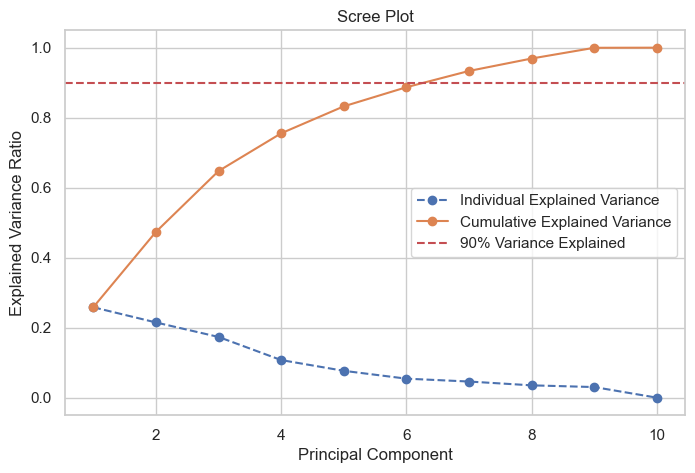

Number of components to retain 90% variance: 7


In [28]:
# Fit PCA to the scaled training data
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance and cumulative sum
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Scree plot for individual explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative Explained Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Explained')
plt.legend()
plt.grid(True)
plt.show()

# Determine number of components to retain 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to retain 90% variance: {n_components}")

# Kaiser Criterion (Eigenvalue > 1)

According to the Kaiser Criterion, only components with an eigenvalue greater than 1 should be retained, as they explain more variance than a single original variable.

In [29]:
# Get eigenvalues (explained variance)
eigenvalues = pca.explained_variance_

# Apply Kaiser criterion: retain components with eigenvalue > 1
kaiser_criterion_components = np.sum(eigenvalues > 1)
print(f"Number of components to retain based on Kaiser Criterion: {kaiser_criterion_components}")

# Display eigenvalues
print("Eigenvalues:", eigenvalues)

Number of components to retain based on Kaiser Criterion: 4
Eigenvalues: [2.58601185 2.15205073 1.7380514  1.07755553 0.77049266 0.5463474
 0.46430649 0.35551789 0.30635383 0.00333374]


# Analysing with 7 Components

In [30]:
n_components = 7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca= pca.transform(X_test_scaled)
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'Principal Component {i+1}' for i in range(n_components)])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'Principal Component {i+1}' for i in range(n_components)])

In [31]:
X_train_pca_df

Principal Component 1  Principal Component 2  Principal Component 3  \
0                    1.250809               0.506964               1.208595   
1                    1.374922               1.038669              -0.414590   
2                   -0.880662              -2.362361              -0.575598   
3                   -1.178334              -0.432525              -0.733019   
4                   -1.267030               0.444825              -0.896443   
...                       ...                    ...                    ...   
464804               1.328797              -1.399505               0.914970   
464805               0.657770               1.234257               4.547895   
464806              -2.499871               0.653243              -0.026688   
464807              -1.358325               1.135187              -0.398771   
464808               1.245227              -0.389522              -0.495392   

        Principal Component 4  Principal Component 5  Principal Component 6  \
0                    0.749135               0.449103               0.981357   
1                    0.058633               0.606330               0.351991   
2                    1.320793               0.377855              -1.345706   
3                   -0.998582               0.769476               0.039375   
4                   -0.939048               0.631380               1.101421   
...                       ...                    ...                    ...   
464804               1.020949              -0.530334               0.725927   
464805              -0.687617              -0.985410               0.201947   
464806               0.031817               0.070070               1.080394   
464807               1.611786               1.976228              -0.541854   
464808               1.460316               0.658161              -0.297100   

        Principal Component 7  
0                    0.816529  
1                    0.987567  
2                   -0.483211  
3                   -0.308173  
4                   -0.519587  
...                       ...  
464804              -0.049048  
464805              -1.873884  
464806               0.222278  
464807              -0.305209  
464808               0.740702  

[464809 rows x 7 columns]

# Random Forest

In [32]:
rf_model = RandomForestClassifier(random_state=42) 
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Make predictions
y_pred = rf_model.predict(X_test_pca) 

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.90
Confusion Matrix:
 [[38098  4322     4     0    10     2   121]
 [ 3131 52913   236     0    69   133    18]
 [    1   474  6323    29     1   293     0]
 [    0     1   138   347     0    40     0]
 [   33   838    20     0  1097     7     0]
 [    9   441   675    18     2  2344     0]
 [  482    42     0     0     0     0  3491]]
Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.90      0.90     42557
           2       0.90      0.94      0.92     56500
           3       0.85      0.89      0.87      7121
           4       0.88      0.66      0.75       526
           5       0.93      0.55      0.69      1995
           6       0.83      0.67      0.74      3489
           7       0.96      0.87      0.91      4015

    accuracy                           0.90    116203
   macro avg       0.90      0.78      0.83    116203
weighted avg       0.90      0.90      0.90    116203



Key Observations:

* Class 1 (Row 1):

Correctly classified: 38,196 out of 42,557 (90% accuracy for Class 1).
Misclassifications: 4,243 instances were wrongly classified as Class 2, and some small numbers were confused with other classes.

* Class 2 (Row 2):

Correctly classified: 53,172 out of 56,500 (94% accuracy for Class 2).
Misclassifications: 2,905 instances misclassified as Class 1, along with smaller numbers in other classes.

* Class 3 (Row 3):

Correctly classified: 6,392 out of 7,121 (89.7% accuracy for Class 3).
Misclassifications: 427 instances misclassified as Class 2, and 269 as Class 6.

* Class 4 (Row 4):

Correctly classified: 349 out of 526 (66% accuracy for Class 4).
Misclassifications: 148 instances confused with Class 3 and 29 with Class 6, indicating difficulties in predicting Class 4.

* Class 5 (Row 5):

Correctly classified: 1,112 out of 1,995 (56% accuracy for Class 5).
Misclassifications: Significant confusion with Class 2 (812 instances).

* Class 6 (Row 6):

Correctly classified: 2,355 out of 3,489 (67.5% accuracy for Class 6).
Misclassifications: High confusion with Class 3 (669 instances) and Class 2 (438 instances).

* Class 7 (Row 7):

Correctly classified: 3,503 out of 4,015 (87% accuracy for Class 7).
Misclassifications: 475 instances confused with Class 1, but otherwise performed well.

#### Summary:
* Strengths: The model performs well for Classes 1, 2, 3, and 7, with high classification accuracy (above 87%).
* Weaknesses:Classes 4, 5, and 6 show lower classification accuracy, particularly Class 4 and 5, where the model struggles with confusion across different classes.
Class 5 is often misclassified as Class 2, and Class 6 shows high confusion with Class 3 and Class 2.

#### Improvement Areas:
Class Imbalance: Classes with fewer instances (such as Class 4 and Class 5) have lower performance, which could be addressed by applying techniques such as oversampling, undersampling, or using class weighting.
Feature Engineering: It may help to introduce more discriminative features to reduce confusion between similar classes, especially for the misclassifications seen in Class 5 and Class 6.

#### Overall Insights:
* Strong Performance: Classes 1, 2, 3, and 7 have high precision, recall, and F1-scores, indicating the model performs well on these classes.
* Challenges: Classes 4, 5, and 6 have lower recall, particularly Class 4 and Class 5. This suggests that the model struggles to identify all instances of these classes, resulting in a higher number of false negatives.
* Improvement Areas: Focusing on improving recall for Classes 4, 5, and 6 could improve the overall performance. Techniques like oversampling, undersampling, or adjusting class weights could help address the imbalance in support and boost recall.

# Hyperparameter Tuning

In [35]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
rf_model.get_params()

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Random Hyperparameter Grid

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Random Search Training

In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_pca, y_train)

In [38]:
rf_random.best_params_

# Evaluate Random Search

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model =  RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(X_train_pca, y_train)
base_accuracy = evaluate(base_model,X_test_pca, y_test)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_pca, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

# Grid Search with Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf =  RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid,X_test_pca, y_test)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

# I was unable to run Grid Search and Random Search as it was taking so much time(due to menory issue).I will need your guidance on the same.